In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image, HTML
import numba
import seaborn as sns

%pylab inline
pylab.rcParams['figure.figsize'] = (18, 5)
pd.set_option('display.max_rows', 5)

Populating the interactive namespace from numpy and matplotlib


In [2]:
charges = pd.read_csv('./inputs/Задание_3/Charges.csv', parse_dates=['BILL_MONTH'])
charges.columns.name = 'charges'
charges.drop_duplicates(inplace=True)
display(charges)
print('unique subscribers #:', len(charges['SUBSCRIBER_ID'].unique()))
print('period:', charges['BILL_MONTH'].min(), '..', charges['BILL_MONTH'].max())

charges,SUBSCRIBER_ID,BILL_MONTH,CHARGES
0,4741,2017-03-01,4.572
1,1754,2017-05-01,4.894
...,...,...,...
112593,4747,2017-06-01,5.182
112594,4992,2017-09-01,6.424


unique subscribers #: 5989
period: 2016-06-01 00:00:00 .. 2017-12-01 00:00:00


In [3]:
dttm_parser = lambda x: pd.NaT if x == '$null$' else pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

plan_changes = pd.read_csv('./inputs/Задание_3/Tariff_plans_change.csv',
                           parse_dates=['START_DTTM', 'END_DTTM'], date_parser=dttm_parser)
plan_changes.columns.name = 'plan_changes'
plan_changes.drop_duplicates(inplace=True)
display(plan_changes)

g = plan_changes.groupby(by='SUBSCRIBER_ID').aggregate(len)
print('subscribers never changed plans #:', len(g[g['TARIFF_PLAN_ID'] < 2]))
print('subscribers had 2 plans #:', len(g[g['TARIFF_PLAN_ID'] == 2]))
print('subscribers had 3 plans #:', len(g[g['TARIFF_PLAN_ID'] == 3]))
print('subscribers had 4 plans #:', len(g[g['TARIFF_PLAN_ID'] == 4]))
print('subscribers had > 4 plans #:', len(g[g['TARIFF_PLAN_ID'] > 4]))

print('unique plans:', plan_changes['TARIFF_PLAN_ID'].unique())
print('unique subscribers #:', len(plan_changes['SUBSCRIBER_ID'].unique()))
print('active subscribers #:', pd.isnull(plan_changes['END_DTTM']).sum())
print('period:', plan_changes['START_DTTM'].min(), '..', plan_changes['END_DTTM'].max())

plan_changes,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17
1,1,3,2017-03-11 14:24:18,NaT
...,...,...,...,...
12342,5989,5,2017-05-24 14:46:11,2017-05-25 20:12:32
12343,5989,1,2017-05-25 20:12:33,NaT


subscribers never changed plans #: 0
subscribers had 2 plans #: 5718
subscribers had 3 plans #: 245
subscribers had 4 plans #: 21
subscribers had > 4 plans #: 5
unique plans: [2 3 1 5 4]
unique subscribers #: 5989
active subscribers #: 5923
period: 1999-07-12 12:55:54 .. 2018-01-19 17:51:56


In [4]:
dt_parser = lambda x: pd.NaT if x == '$null$' else pd.datetime.strptime(x, '%Y-%m-%d')

suspensions = pd.read_csv('./inputs/Задание_3/Suspended.csv', 
                          parse_dates=['START_DT', 'END_DT'], date_parser=dt_parser)
suspensions.columns.name = 'suspensions'
suspensions.drop_duplicates(inplace=True)
suspensions['duration'] = suspensions['END_DT'] - suspensions['START_DT']
display(suspensions)
print('unique subscribers #:', len(suspensions['SUBSCRIBER_ID'].unique()))
print('suspended subscribers #:', pd.isnull(suspensions['END_DT']).sum())
print('period:', suspensions['START_DT'].min(), '..', suspensions['END_DT'].max())

suspensions,SUBSCRIBER_ID,START_DT,END_DT,STATUS,duration
0,5195,2017-12-27,2017-12-27,Suspended,0 days
1,5198,2017-04-18,2017-04-18,Suspended,0 days
...,...,...,...,...,...
4061,2166,2016-06-11,2016-06-11,Suspended,0 days
4062,2166,2016-06-05,2016-06-05,Suspended,0 days


unique subscribers #: 1310
suspended subscribers #: 66
period: 2016-06-01 00:00:00 .. 2018-01-17 00:00:00


In [5]:
charges_pivoted = charges.pivot(columns='BILL_MONTH', values='CHARGES', index='SUBSCRIBER_ID')
display(charges_pivoted)

BILL_MONTH,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00
SUBSCRIBER_ID,,,,,,,,,,,,,,,,,,,
1,21.137,32.545,30.042,24.964,27.628,22.374,21.132,20.268,27.858,27.660,23.983,27.487,23.651,28.552,32.074,24.012,20.464,19.296,16.062
2,4.756,5.868,5.876,4.853,5.237,6.946,5.750,5.327,5.092,5.467,5.440,5.868,5.675,5.044,5.368,4.984,5.292,4.964,4.964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.667,11.506,8.632,8.516,4.884,6.589,0.000,0.000
5989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.294,5.068,5.016,5.122,6.068,5.752,5.088,5.226


mean monthly stays pretty much the same, no reason to complicate things by accounting for the trend


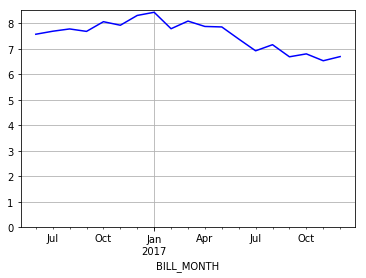

In [36]:
mean_charges_per_month = charges_pivoted.mean(axis=0)
mean_charges_per_month.plot(ylim=(0, None), color='blue', grid=True)
print('mean monthly stays pretty much the same, no reason to complicate things by accounting for the trend')

In [7]:
charges_per_subscriber = charges_pivoted.sum(axis=1)
display(charges_per_subscriber)

SUBSCRIBER_ID
1       471.189
2       102.771
         ...   
5988     59.794
5989     38.634
Length: 5989, dtype: float64

In [8]:
plans = plan_changes.copy()

# should have used some dataframe shift trick here
@numba.jit
def find_prev_plans(plan_changes):
    p = plan_changes
    p.sort_values(by=['SUBSCRIBER_ID', 'START_DTTM'], inplace=True)
    p['duration'] = p['END_DTTM'] - p['START_DTTM']
    p['prev_plan_row'] = pd.Series(-1, index=p.index, dtype=p.index.dtype)
    p['prev_plan'] = pd.Series(index=p.index, dtype=p['TARIFF_PLAN_ID'].dtype)
    p['prev_duration'] = pd.Series(pd.NaT, index=p.index, dtype=p['duration'].dtype)
    p['no_plan_duration'] = pd.Series(pd.NaT, index=p.index, dtype=p['duration'].dtype)
    
    prev_subs = None
    prev_plan = -1
    prev_dur = pd.NaT
    prev_end = pd.NaT
    for i in p.index:
        row = p.loc[i]
        subs, plan, dur, start, end = row[['SUBSCRIBER_ID', 'TARIFF_PLAN_ID', 'duration', 'START_DTTM', 'END_DTTM']]
        if subs != prev_subs: 
            prev_subs = subs
            prev_plan_row = -1
            prev_plan = -1
            prev_dur = pd.NaT
            prev_end = pd.NaT
        p.at[i, 'prev_plan_row'] = prev_plan_row
        p.at[i, 'prev_plan'] = prev_plan
        p.at[i, 'prev_duration'] = prev_dur
        p.at[i, 'no_plan_duration'] = start - prev_end
        prev_plan_row = i
        prev_plan = plan
        prev_dur = dur
        prev_end = end


find_prev_plans(plans)
with pd.option_context('display.max_rows', 5):
    display(plans.iloc[:])
    print(plans['no_plan_duration'].describe())

plan_changes,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,duration,prev_plan_row,prev_plan,prev_duration,no_plan_duration
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17,1204 days 17:14:09,-1,-1,NaT,NaT
1,1,3,2017-03-11 14:24:18,NaT,NaT,0,2,1204 days 17:14:09,00:00:01
...,...,...,...,...,...,...,...,...,...
12342,5989,5,2017-05-24 14:46:11,2017-05-25 20:12:32,1 days 05:26:21,-1,-1,NaT,NaT
12343,5989,1,2017-05-25 20:12:33,NaT,NaT,12342,5,1 days 05:26:21,00:00:01


count                      6298
mean     0 days 02:18:18.355986
                  ...          
75%             0 days 00:00:01
max           135 days 19:48:11
Name: no_plan_duration, Length: 8, dtype: object


In [9]:
# not sure if a change after a long delay should still be considered a change
no_plan_long_duration = pd.Timedelta(30, 'D')
long_plans = plans['no_plan_duration'] > no_plan_long_duration
same_plans = plans['TARIFF_PLAN_ID'] == plans['prev_plan'] # easier to drop them
plans_to_drop = plans[long_plans | same_plans]
ps = plans.drop(index=plans_to_drop.index)

with pd.option_context('display.max_rows', 10):
    print('dropped plans #:', len(plans_to_drop))
    print('plans after dropping #:', len(ps))
    print('same plans #:', len(same_plans))
    display(plans_to_drop)

dropped plans #: 13
plans after dropping #: 12274
same plans #: 12287


plan_changes,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,duration,prev_plan_row,prev_plan,prev_duration,no_plan_duration
92,46,3,2017-02-02 14:24:13,2017-04-13 18:07:58,70 days 03:43:45,91,3,2411 days 05:57:01,1 days 21:57:53
289,140,5,2017-05-21 12:07:46,NaT,NaT,288,5,55 days 16:05:48,1 days 23:30:16
387,187,4,2017-05-23 21:18:55,2017-06-09 13:38:02,16 days 16:19:07,386,5,38 days 06:33:22,103 days 02:24:03
983,475,3,2017-06-01 10:27:43,NaT,NaT,982,5,11 days 05:47:20,135 days 19:48:11
2486,1209,5,2017-04-01 12:02:41,NaT,NaT,2485,5,29 days 21:34:33,30 days 23:38:40
...,...,...,...,...,...,...,...,...,...
9077,4420,5,2017-04-01 15:27:13,NaT,NaT,9076,5,7 days 15:34:46,29 days 00:35:11
9466,4608,1,2017-05-11 16:09:07,2017-06-02 17:07:39,22 days 00:58:32,9465,3,382 days 21:59:25,55 days 07:36:31
11496,5591,4,2017-01-02 11:39:43,2017-05-26 09:56:11,143 days 22:16:28,11495,4,265 days 22:00:36,0 days 01:22:43
11576,5630,3,2017-04-01 21:49:58,NaT,NaT,11575,3,19 days 18:40:34,45 days 07:12:51


In [10]:
def dur_aggfunc(series):
    return np.sum(series) #if series.count() else pd.NaT

plans_pivoted = ps.pivot_table(columns='TARIFF_PLAN_ID', index='SUBSCRIBER_ID', values='duration',
                                  aggfunc=dur_aggfunc)
with pd.option_context('display.max_rows', 10):
    display(plans_pivoted)

TARIFF_PLAN_ID,1,2,3,4,5
SUBSCRIBER_ID,,,,,
1,NaT,1204 days 17:14:09,0 days 00:00:00,NaT,NaT
2,509 days 20:03:24,NaT,NaT,NaT,0 days 00:00:00
3,708 days 16:43:13,NaT,NaT,NaT,0 days 00:00:00
4,NaT,NaT,347 days 20:23:59,NaT,0 days 00:00:00
5,457 days 04:32:44,NaT,NaT,NaT,0 days 00:00:00
...,...,...,...,...,...
5985,NaT,NaT,NaT,64 days 00:59:13,0 days 00:00:00
5986,0 days 00:00:00,NaT,NaT,NaT,57 days 06:16:30
5987,NaT,NaT,0 days 00:00:00,NaT,14 days 19:40:35


In [11]:
migrations = ps.pivot_table(index='prev_plan', columns='TARIFF_PLAN_ID', values='duration', aggfunc=len)

with pd.option_context('display.max_rows', 10):
    print('total migrations #', len(ps))
    display(migrations)
print(migrations.to_json(orient='columns'))
migrations.to_json('outputs/migrations.json')

total migrations # 12274


TARIFF_PLAN_ID,1,2,3,4,5
prev_plan,,,,,
-1,2021.0,604.0,2745.0,528.0,91.0
1,NaN,5.0,55.0,378.0,1613.0
2,13.0,NaN,20.0,158.0,417.0
3,27.0,12.0,NaN,367.0,2372.0
4,37.0,20.0,56.0,NaN,528.0
5,81.0,4.0,74.0,48.0,NaN


{"1":{"-1":2021.0,"1":null,"2":13.0,"3":27.0,"4":37.0,"5":81.0},"2":{"-1":604.0,"1":5.0,"2":null,"3":12.0,"4":20.0,"5":4.0},"3":{"-1":2745.0,"1":55.0,"2":20.0,"3":null,"4":56.0,"5":74.0},"4":{"-1":528.0,"1":378.0,"2":158.0,"3":367.0,"4":null,"5":48.0},"5":{"-1":91.0,"1":1613.0,"2":417.0,"3":2372.0,"4":528.0,"5":null}}


In [12]:
display(HTML(filename='migrations-flow/dist/index.html'))
# display(Image(filename='outputs/migrations-all-time.png'))

In [13]:
chs = charges.sort_values(by=['SUBSCRIBER_ID', 'BILL_MONTH']).set_index(['SUBSCRIBER_ID'])

with pd.option_context('display.max_rows', 14):
    display(chs.head(25))

charges,BILL_MONTH,CHARGES
SUBSCRIBER_ID,,
1,2016-06-01,21.137
1,2016-07-01,32.545
1,2016-08-01,30.042
1,2016-09-01,24.964
1,2016-10-01,27.628
1,2016-11-01,22.374
1,2016-12-01,21.132
...,...,...
1,2017-12-01,16.062


In [14]:
from pandas.tseries.offsets import MonthBegin, MonthEnd

plans_with_charges = ps.iloc[:].copy()
plans_max_end = plans_with_charges['END_DTTM'].max()
plans_with_charges.loc[pd.isnull(plans_with_charges['END_DTTM']), 'END_DTTM'] = plans_max_end
plans_with_charges['START_DTTM'] = (plans_with_charges['START_DTTM'] + MonthBegin(1)).dt.floor('D')
plans_with_charges['END_DTTM'] = (plans_with_charges['END_DTTM'] + MonthBegin(-1)).dt.floor('D')

# @numba.jit
def calc_charges_per_plan(plans, charges):
    plans['charged'] = pd.Series(index=plans.index, dtype=charges['CHARGES'].dtype)
    plans['ch_beg3'] = pd.Series(index=plans.index, dtype=charges['CHARGES'].dtype)
    plans['ch_end3'] = pd.Series(index=plans.index, dtype=charges['CHARGES'].dtype)
    plans['full_months_with_charging_info'] = pd.Series(index=plans.index, dtype=int)
    for plan in plans.itertuples():
        index, subs, _, start, end, *_ = plan
        all_chs = charges.loc[subs]
        chs = all_chs[(all_chs['BILL_MONTH'] >= start) & (all_chs['BILL_MONTH'] < end)]
#         display(all_chs)
#         display(chs)
        plans.at[index, 'full_months_with_charging_info'] = len(chs)
        plans.at[index, 'charged'] = chs['CHARGES'].sum()
        plans.at[index, 'ch_beg3'] = chs.iloc[:3]['CHARGES'].sum()
        plans.at[index, 'ch_end3'] = chs.iloc[-3:]['CHARGES'].sum()

calc_charges_per_plan(plans_with_charges, chs)
plans_with_charges['mean_charged_per_month'] = plans_with_charges['charged'] / plans_with_charges['full_months_with_charging_info']

with pd.option_context('display.max_rows', 5):
    display(plans)
    display(plans_with_charges)
plans_with_charges.drop(columns=['START_DTTM', 'END_DTTM', 'no_plan_duration'], inplace=True)

plan_changes,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,duration,prev_plan_row,prev_plan,prev_duration,no_plan_duration
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17,1204 days 17:14:09,-1,-1,NaT,NaT
1,1,3,2017-03-11 14:24:18,NaT,NaT,0,2,1204 days 17:14:09,00:00:01
...,...,...,...,...,...,...,...,...,...
12342,5989,5,2017-05-24 14:46:11,2017-05-25 20:12:32,1 days 05:26:21,-1,-1,NaT,NaT
12343,5989,1,2017-05-25 20:12:33,NaT,NaT,12342,5,1 days 05:26:21,00:00:01


plan_changes,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,duration,prev_plan_row,prev_plan,prev_duration,no_plan_duration,charged,ch_beg3,ch_end3,full_months_with_charging_info,mean_charged_per_month
0,1,2,2013-12-01,2017-03-01,1204 days 17:14:09,-1,-1,NaT,NaT,227.948,83.724,69.258,9,25.327556
1,1,3,2017-04-01,2018-01-01,NaT,0,2,1204 days 17:14:09,00:00:01,215.581,75.121,55.822,9,23.953444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12342,5989,5,2017-06-01,2017-05-01,1 days 05:26:21,-1,-1,NaT,NaT,0.000,0.000,0.000,0,NaN
12343,5989,1,2017-06-01,2018-01-01,NaT,12342,5,1 days 05:26:21,00:00:01,37.340,15.206,16.066,7,5.334286


In [15]:
ps_with_chs = plans_with_charges.copy()

ps_with_chs['prev_mean'] = pd.Series(index=ps_with_chs.index, dtype=ps_with_chs['mean_charged_per_month'].dtype)
for row in ps_with_chs.itertuples():
    i = row[0]
    prew_plan_row = getattr(row, 'prev_plan_row')
    if prew_plan_row not in ps_with_chs.index: continue
    ps_with_chs.at[i, 'prev_mean'] = ps_with_chs.at[prew_plan_row, 'mean_charged_per_month']
    ps_with_chs.at[i, 'prev_ch_end3'] = ps_with_chs.at[prew_plan_row, 'ch_end3']

ps_with_chs['change3'] = ps_with_chs['ch_beg3'] / ps_with_chs['prev_ch_end3']
change3 = ps_with_chs['change3'].copy()
change3[(change3 == np.inf) | (change3 == -np.inf) | (change3 == 0)] = np.nan
ps_with_chs['change3'] = change3

ps_with_chs['was0'] = (ps_with_chs['prev_ch_end3'] == 0) & (ps_with_chs['ch_beg3'] > 0)
ps_with_chs['bec0'] = (ps_with_chs['prev_ch_end3'] > 0) & (ps_with_chs['ch_beg3'] == 0)
ps_with_chs['rem0'] = (ps_with_chs['prev_ch_end3'] == 0) & (ps_with_chs['ch_beg3'] == 0)
# ps_with_chs = ps_with_chs[ps_with_chs['full_months_with_charging_info'] > 0]
ps_with_chs_cols_to_drop = ['charged', 'full_months_with_charging_info', 'SUBSCRIBER_ID', 'prev_plan_row', 'SUBSCRIBER_ID', 'prev_plan_row']

ps_with_chs.drop(columns=ps_with_chs_cols_to_drop, inplace=True)
print('subscribers started to pay after change :) #:', ps_with_chs['was0'].sum())
print('subscribers gave up paying after change :( #:', ps_with_chs['bec0'].sum())
print('subscribers never payed :(( #:', ps_with_chs['rem0'].sum())
with pd.option_context('display.max_rows', 10):
    display(ps_with_chs)

subscribers started to pay after change :) #: 273
subscribers gave up paying after change :( #: 170
subscribers never payed :(( #: 49


plan_changes,TARIFF_PLAN_ID,duration,prev_plan,prev_duration,ch_beg3,ch_end3,mean_charged_per_month,prev_mean,prev_ch_end3,change3,was0,bec0,rem0
0,2,1204 days 17:14:09,-1,NaT,83.724,69.258,25.327556,NaN,NaN,NaN,False,False,False
1,3,NaT,2,1204 days 17:14:09,75.121,55.822,23.953444,25.327556,69.258,1.084654,False,False,False
2,1,509 days 20:03:24,-1,NaT,16.500,16.775,5.540000,NaN,NaN,NaN,False,False,False
3,5,NaT,1,509 days 20:03:24,15.396,15.220,5.102667,5.540000,16.775,0.917794,False,False,False
4,1,708 days 16:43:13,-1,NaT,14.328,15.579,5.072700,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12339,3,NaT,5,14 days 19:40:35,11.619,46.376,11.133571,NaN,0.000,NaN,True,False,False
12340,1,12 days 06:00:02,-1,NaT,0.000,0.000,NaN,NaN,NaN,NaN,False,False,False
12341,4,NaT,1,12 days 06:00:02,28.654,6.589,5.732429,NaN,0.000,NaN,True,False,False
12342,5,1 days 05:26:21,-1,NaT,0.000,0.000,NaN,NaN,NaN,NaN,False,False,False


In [16]:
charges_per_plan = ps_with_chs.groupby(by='TARIFF_PLAN_ID').mean()
charges_per_plan.drop(columns=['prev_plan'], inplace=True)
display(charges_per_plan)

plan_changes,ch_beg3,ch_end3,mean_charged_per_month,prev_mean,prev_ch_end3,change3,was0,bec0,rem0
TARIFF_PLAN_ID,,,,,,,,,
1,21.619849,24.932339,7.807566,7.353723,10.323405,1.621665,0.026618,0.004589,0.005507
2,18.084622,23.523384,6.863734,5.482400,11.326341,3.185353,0.010853,0.001550,0.003101
3,24.997506,26.834251,8.796007,10.202271,18.385623,1.589724,0.020678,0.005085,0.005424
4,13.349662,14.088172,5.347599,6.790478,19.813015,0.820164,0.027721,0.033130,0.003381
5,20.232386,20.142026,7.059529,8.250615,25.599121,1.010708,0.021111,0.018921,0.002788


TARIFF_PLAN_ID,1,2,3,4,5
prev_plan,,,,,
1,NaN,0.767397,1.154314,0.723765,0.966622
2,0.926084,NaN,1.080681,1.099775,1.151276
3,1.013805,1.712845,NaN,0.784368,0.831654
4,2.205816,4.683611,2.076677,NaN,1.953701
5,1.968821,3.134213,2.424487,1.196284,NaN


charge_changes_num_data


TARIFF_PLAN_ID,1,2,3,4,5
prev_plan,,,,,
-1,0.0,0.0,0.0,0.0,0.0
1,NaN,5.0,46.0,362.0,1544.0
2,13.0,NaN,16.0,146.0,404.0
3,20.0,8.0,NaN,330.0,2302.0
4,25.0,16.0,39.0,NaN,450.0
5,19.0,2.0,11.0,16.0,NaN


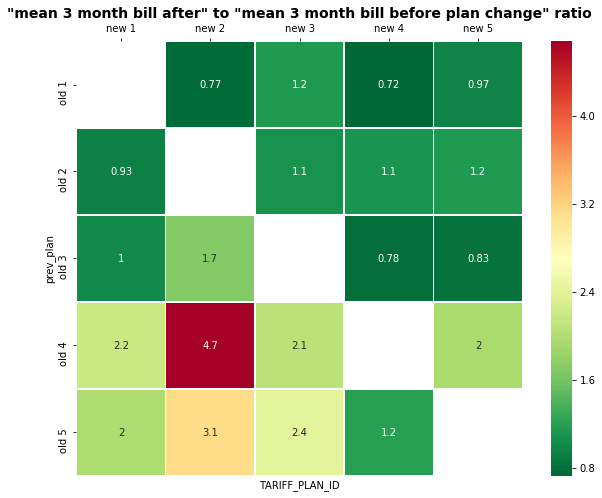

In [94]:
charge_changes = ps_with_chs.pivot_table(index='prev_plan', columns='TARIFF_PLAN_ID', values='change3', aggfunc=np.mean)
charge_changes_num_data = ps_with_chs.pivot_table(index='prev_plan', columns='TARIFF_PLAN_ID', values='change3', aggfunc=lambda s: (s > 0).sum())
before_unpayers = ps_with_chs.pivot_table(index='prev_plan', columns='TARIFF_PLAN_ID', values='was0', aggfunc=np.sum)
after_unpayers = ps_with_chs.pivot_table(index='prev_plan', columns='TARIFF_PLAN_ID', values='bec0', aggfunc=np.sum)
with pd.option_context('display.max_rows', 10):
    # display(charge_changes.style.background_gradient(cmap='summer'))
    display(charge_changes)
    print('charge_changes_num_data')
    display(charge_changes_num_data)
#     display(former_unpayers)
#     display(after_unpayers)
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('"mean 3 month bill after" to "mean 3 month bill before plan change" ratio',
             fontsize=14, fontweight="bold")
ax.xaxis.set_ticks_position('top')
# labels = np.array([[v if v > 0 else 0 for v in row] for row in charge_changes_num_data.values[1:]])
# print(labels)
sns.heatmap(charge_changes, cmap='RdYlGn_r', linewidths=0.5, annot=True, ax=ax, 
            xticklabels=['new ' + str(col) for col in charge_changes],
            yticklabels=['old ' + str(row) for row in charge_changes.index]
           )

In [44]:
plans_with_suspensions = ps.iloc[:].copy()
display(plans_with_suspensions)

plan_changes,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,duration,prev_plan_row,prev_plan,prev_duration,no_plan_duration
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17,1204 days 17:14:09,-1,-1,NaT,NaT
1,1,3,2017-03-11 14:24:18,NaT,NaT,0,2,1204 days 17:14:09,00:00:01
...,...,...,...,...,...,...,...,...,...
12342,5989,5,2017-05-24 14:46:11,2017-05-25 20:12:32,1 days 05:26:21,-1,-1,NaT,NaT
12343,5989,1,2017-05-25 20:12:33,NaT,NaT,12342,5,1 days 05:26:21,00:00:01
